In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitudes and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [7]:
# Import the requests library.
import requests

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=29aa51b70ba15478a19ac938827a780d


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 71.02,
  'feels_like': 72.05,
  'temp_min': 67.32,
  'temp_max': 73.35,
  'pressure': 1010,
  'humidity': 90},
 'visibility': 10000,
 'wind': {'speed': 7, 'deg': 307, 'gust': 10},
 'clouds': {'all': 20},
 'dt': 1659087473,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1659087218,
  'sunset': 1659139655},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | saint-leu
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | mrirt
City not found. Skipping...
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | fenoarivo
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | okhotsk
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | sioux lookout
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 17 of Set 1 | meulaboh
Processing Record 18 of Set 1 | dire
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of

Processing Record 38 of Set 4 | fairbanks
Processing Record 39 of Set 4 | port blair
Processing Record 40 of Set 4 | kungurtug
Processing Record 41 of Set 4 | hovd
Processing Record 42 of Set 4 | nome
Processing Record 43 of Set 4 | hearst
Processing Record 44 of Set 4 | kalangala
Processing Record 45 of Set 4 | pangnirtung
Processing Record 46 of Set 4 | yanam
Processing Record 47 of Set 4 | owando
Processing Record 48 of Set 4 | flin flon
Processing Record 49 of Set 4 | ginda
Processing Record 50 of Set 4 | codrington
Processing Record 1 of Set 5 | aracuai
Processing Record 2 of Set 5 | safford
Processing Record 3 of Set 5 | caseiu
Processing Record 4 of Set 5 | vvedenskoye
Processing Record 5 of Set 5 | saleaula
City not found. Skipping...
Processing Record 6 of Set 5 | chuy
Processing Record 7 of Set 5 | vardo
Processing Record 8 of Set 5 | mitsamiouli
Processing Record 9 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 5 | maturin
Processing Record 1

Processing Record 24 of Set 8 | wuwei
Processing Record 25 of Set 8 | agva
City not found. Skipping...
Processing Record 26 of Set 8 | los llanos de aridane
Processing Record 27 of Set 8 | show low
Processing Record 28 of Set 8 | ilulissat
Processing Record 29 of Set 8 | sedam
Processing Record 30 of Set 8 | vallenar
Processing Record 31 of Set 8 | marzuq
Processing Record 32 of Set 8 | qinzhou
Processing Record 33 of Set 8 | menongue
Processing Record 34 of Set 8 | egvekinot
Processing Record 35 of Set 8 | sao filipe
Processing Record 36 of Set 8 | husavik
Processing Record 37 of Set 8 | umm ruwabah
City not found. Skipping...
Processing Record 38 of Set 8 | virginia beach
Processing Record 39 of Set 8 | riyadh
Processing Record 40 of Set 8 | kisangani
Processing Record 41 of Set 8 | spirit river
Processing Record 42 of Set 8 | ochakiv
Processing Record 43 of Set 8 | goianesia
Processing Record 44 of Set 8 | geraldton
Processing Record 45 of Set 8 | dentsville
Processing Record 46 of 

Processing Record 13 of Set 12 | ngunguru
Processing Record 14 of Set 12 | caravelas
Processing Record 15 of Set 12 | karratha
Processing Record 16 of Set 12 | deputatskiy
Processing Record 17 of Set 12 | asmara
Processing Record 18 of Set 12 | nara
Processing Record 19 of Set 12 | ballina
Processing Record 20 of Set 12 | port macquarie
Processing Record 21 of Set 12 | kiunga
Processing Record 22 of Set 12 | rincon
Processing Record 23 of Set 12 | margate
Processing Record 24 of Set 12 | aksu
Processing Record 25 of Set 12 | moerai
Processing Record 26 of Set 12 | rungata
City not found. Skipping...
Processing Record 27 of Set 12 | lima
Processing Record 28 of Set 12 | tomatlan
Processing Record 29 of Set 12 | mackay
Processing Record 30 of Set 12 | breves
Processing Record 31 of Set 12 | yerbogachen
Processing Record 32 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 33 of Set 12 | sinegorye
Processing Record 34 of Set 12 | severodvinsk
Processing Record 35 of 

In [15]:
print(len(city_data))

574


In [16]:
city_data

[{'City': 'Saint George',
  'Lat': 37.1041,
  'Lng': -113.5841,
  'Max Temp': 78.64,
  'Humidity': 62,
  'Cloudiness': 0,
  'Wind Speed': 3.44,
  'Country': 'US',
  'Date': '2022-07-29 09:47:18'},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 73.18,
  'Humidity': 74,
  'Cloudiness': 17,
  'Wind Speed': 21.23,
  'Country': 'PF',
  'Date': '2022-07-29 09:47:18'},
 {'City': 'Saint-Leu',
  'Lat': -21.15,
  'Lng': 55.2833,
  'Max Temp': 76.68,
  'Humidity': 74,
  'Cloudiness': 20,
  'Wind Speed': 3.71,
  'Country': 'RE',
  'Date': '2022-07-29 09:47:19'},
 {'City': 'Barrow',
  'Lat': 71.2906,
  'Lng': -156.7887,
  'Max Temp': 33.55,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 9.19,
  'Country': 'US',
  'Date': '2022-07-29 09:47:19'},
 {'City': 'Castro',
  'Lat': -24.7911,
  'Lng': -50.0119,
  'Max Temp': 56.64,
  'Humidity': 90,
  'Cloudiness': 79,
  'Wind Speed': 8.63,
  'Country': 'BR',
  'Date': '2022-07-29 09:47:20'},
 {'City': 'Puerto Ayora',
  'La

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,78.64,62,0,3.44,US,2022-07-29 09:47:18
1,Rikitea,-23.1203,-134.9692,73.18,74,17,21.23,PF,2022-07-29 09:47:18
2,Saint-Leu,-21.1500,55.2833,76.68,74,20,3.71,RE,2022-07-29 09:47:19
3,Barrow,71.2906,-156.7887,33.55,94,100,9.19,US,2022-07-29 09:47:19
4,Castro,-24.7911,-50.0119,56.64,90,79,8.63,BR,2022-07-29 09:47:20
5,Puerto Ayora,-0.7393,-90.3518,68.56,99,99,4.00,EC,2022-07-29 09:46:43
6,Albany,42.6001,-73.9662,68.41,94,76,3.85,US,2022-07-29 09:44:04
7,Fenoarivo,-18.9330,47.4354,66.27,63,75,9.22,MG,2022-07-29 09:47:20
8,Okhotsk,59.3833,143.3000,61.05,90,57,13.38,RU,2022-07-29 09:47:21
9,Talnakh,69.4865,88.3972,76.21,46,0,10.71,RU,2022-07-29 09:47:22


In [18]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [19]:
city_data_df = city_data_df[new_column_order]

In [20]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2022-07-29 09:47:18,37.1041,-113.5841,78.64,62,0,3.44
1,Rikitea,PF,2022-07-29 09:47:18,-23.1203,-134.9692,73.18,74,17,21.23
2,Saint-Leu,RE,2022-07-29 09:47:19,-21.1500,55.2833,76.68,74,20,3.71
3,Barrow,US,2022-07-29 09:47:19,71.2906,-156.7887,33.55,94,100,9.19
4,Castro,BR,2022-07-29 09:47:20,-24.7911,-50.0119,56.64,90,79,8.63
5,Puerto Ayora,EC,2022-07-29 09:46:43,-0.7393,-90.3518,68.56,99,99,4.00
6,Albany,US,2022-07-29 09:44:04,42.6001,-73.9662,68.41,94,76,3.85
7,Fenoarivo,MG,2022-07-29 09:47:20,-18.9330,47.4354,66.27,63,75,9.22
8,Okhotsk,RU,2022-07-29 09:47:21,59.3833,143.3000,61.05,90,57,13.38
9,Talnakh,RU,2022-07-29 09:47:22,69.4865,88.3972,76.21,46,0,10.71


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

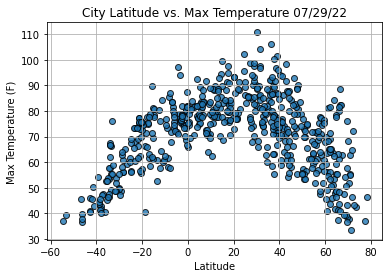

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

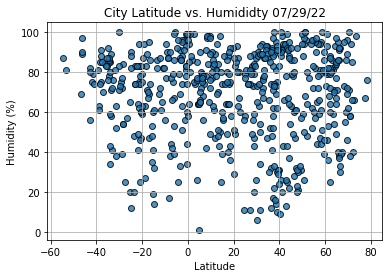

In [25]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humididty "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

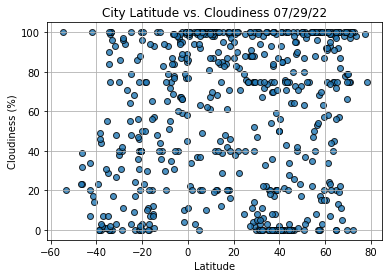

In [26]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

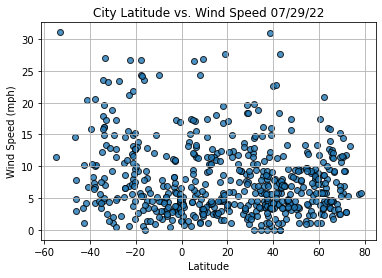

In [27]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]

In [33]:
index13

City                     Meulaboh
Country                        ID
Date          2022-07-29 09:47:23
Lat                        4.1363
Lng                       96.1285
Max Temp                    77.95
Humidity                       85
Cloudiness                     99
Wind Speed                   0.69
Name: 13, dtype: object

In [34]:
city_data_df['Lat'] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
569    False
570     True
571     True
572     True
573    False
Name: Lat, Length: 574, dtype: bool

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2022-07-29 09:47:18,37.1041,-113.5841,78.64,62,0,3.44
3,Barrow,US,2022-07-29 09:47:19,71.2906,-156.7887,33.55,94,100,9.19
6,Albany,US,2022-07-29 09:44:04,42.6001,-73.9662,68.41,94,76,3.85
8,Okhotsk,RU,2022-07-29 09:47:21,59.3833,143.3000,61.05,90,57,13.38
9,Talnakh,RU,2022-07-29 09:47:22,69.4865,88.3972,76.21,46,0,10.71
...,...,...,...,...,...,...,...,...,...
567,Jian,CN,2022-07-29 10:03:11,27.1172,114.9793,76.73,88,100,13.09
568,Makokou,GA,2022-07-29 10:03:11,0.5738,12.8642,78.78,64,100,3.87
570,Oshkosh,US,2022-07-29 10:03:12,44.0247,-88.5426,58.89,87,0,3.44
571,Castlegar,CA,2022-07-29 10:00:29,49.2998,-117.6689,74.10,57,17,3.56


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

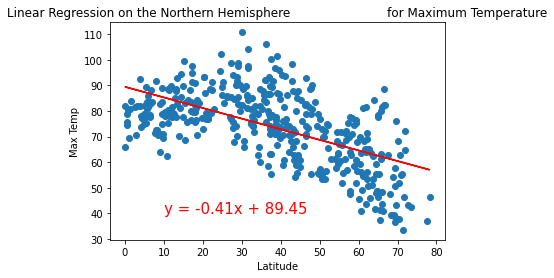

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

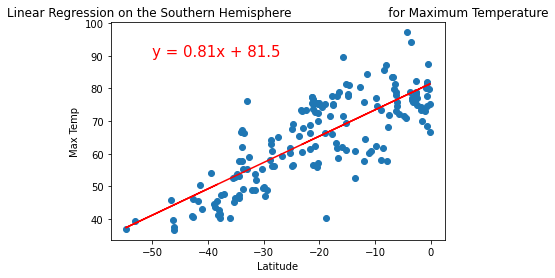

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

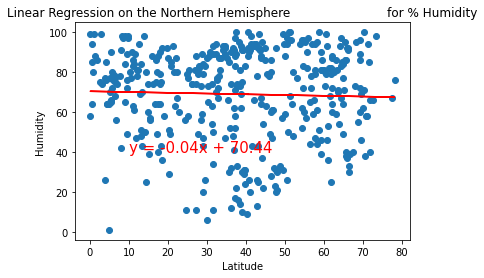

In [41]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', 'Humidity',(10,40))

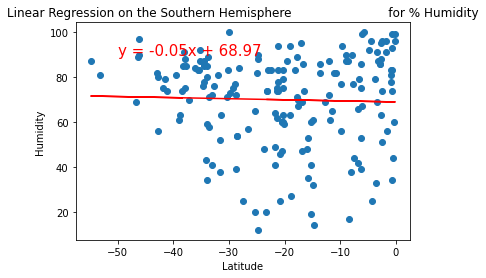

In [43]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', 'Humidity',(-50,90))

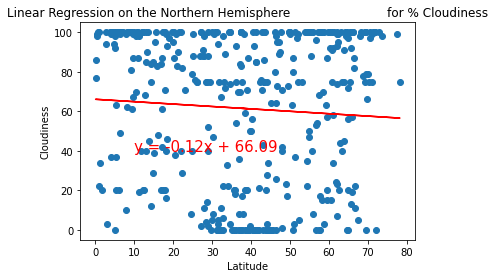

In [44]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'Cloudiness',(10,40))

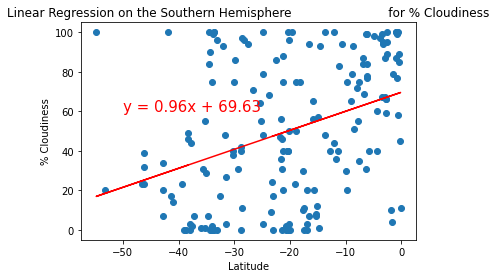

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

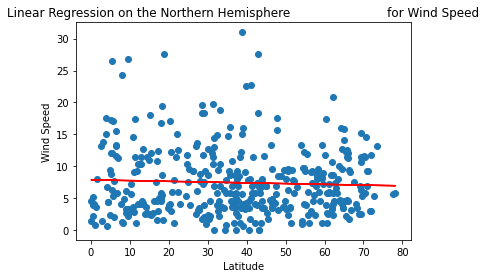

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

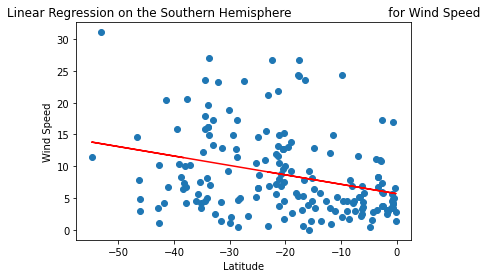

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))